In [27]:
module load Singularity
sos run ~/project/bioworkflows/GWAS/LMM.ipynb regenie_burden \
    --cwd ~/output \
    --bfile ~/Rare_Variants_MWE/genotypes_21_22_plink.exome.bed \
    --genoFile ~/Rare_Variants_MWE/ukb23155_c22_b0_v1.plink.exome.filtered.bed \
    --phenoFile ~/Rare_Variants_MWE/phenotype_burden.txt\
    --phenoCol ASTHMA T2D \
    --formatFile ~/project/UKBB_GWAS_dev/data/regenie_template.yml \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 8 \
    --bsize 1000 \
    --anno_file ~/Rare_Variants_MWE/annotation_file.txt\
    --set_list ~/Rare_Variants_MWE/set_list_file_chr22.txt \
    --mask_file ~/Rare_Variants_MWE/mask_file.txt \
    --keep_gene ~/Rare_Variants_MWE/keep_gene.txt\
    --aaf_bins 0.05 \
    --trait bt \
    --build_mask max \
    --container_lmm /mnt/mfs/statgen/containers/lmm.sif \
    -s build

INFO: Running PLINK_QC: Select the SNPs and samples to be used based on maf, geno, hwe and mind options
INFO: Step PLINK_QC (index=0) is ignored with signature constructed
INFO: PLINK_QC output:   /home/dmc2245/output/cache/genotypes_21_22_plink.exome.qc_pass.id /home/dmc2245/output/cache/genotypes_21_22_plink.exome.qc_pass.snplist
INFO: Running regenie_burden_1: Run REGENIE step 1: fitting the null
INFO: Step regenie_burden_1 (index=0) is ignored with signature constructed
INFO: regenie_burden_1 output:   /home/dmc2245/output/phenotype_burden_ASTHMA_T2D.regenie_pred.list
INFO: Running regenie_burden_2: Run regenie for burden tests
INFO: Step regenie_burden_2 (index=0) is ignored with signature constructed
INFO: regenie_burden_2 output:   /home/dmc2245/output/cache/ukb23155_c22_b0_v1.plink.exome.filtered_burden_ASTHMA.regenie.gz /home/dmc2245/output/cache/ukb23155_c22_b0_v1.plink.exome.filtered_burden_T2D.regenie.gz
INFO: Running regenie_burden_3: Merge results and log files
INFO: Step

: 1

In [17]:
R --version

R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [18]:
install.packages('qqman')

Installing package into ‘/mnt/mfs/hgrcgrid/homes/dmc2245/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



ERROR: Error in readRDS(dest): error reading from connection


In [19]:
library('qqman')
data <- read.table(gzfile('/home/dmc2245/output/phenotype_burden_ASTHMA.regenie_burden.snp_stats.gz'), sep='\t', header=T)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [20]:
head(data)

,CHR,POS,REF,ALT,SNP,BETA,SE,P
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,22,15528179,G,T,22:15528179:G:T,1.1984400,0.823429,0.8369790
2,22,15528558,G,A,22:15528558:G:A,-0.1985190,1.065240,0.0694781
3,22,15528913,C,T,22:15528913:C:T,-0.1165630,0.226555,0.2168820
4,22,15529064,C,T,22:15529064:C:T,-0.0243028,0.362856,0.0238333
5,22,15690112,C,T,22:15690112:C:T,-0.3104060,0.367281,0.4000830
6,22,15690179,G,A,22:15690179:G:A,-2.5692300,1.719610,1.4828300


[1] 4

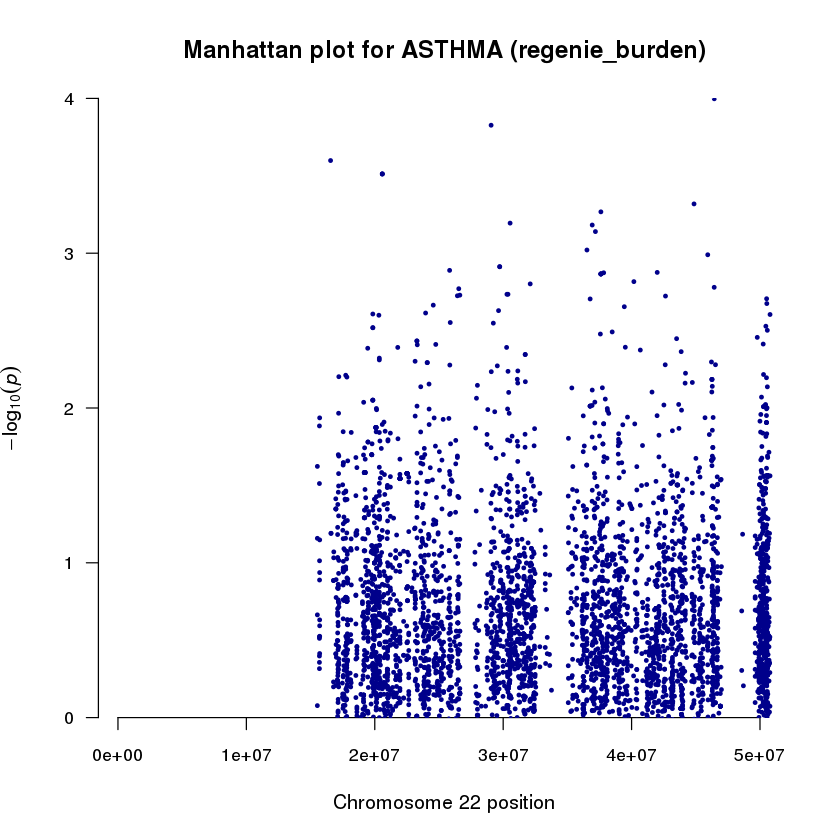

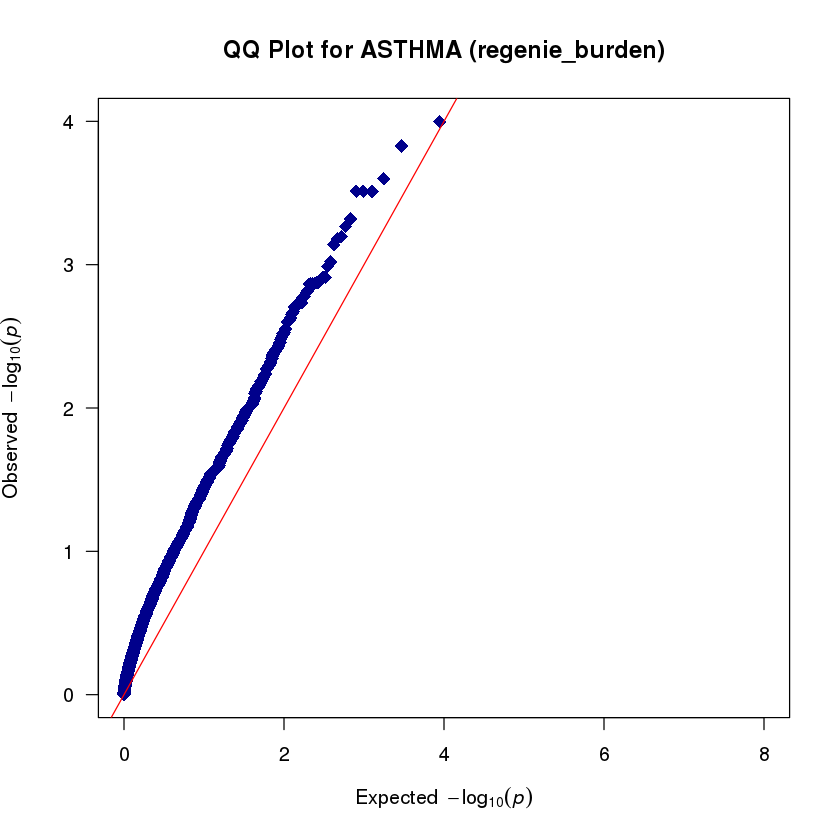

In [26]:
lambda <- median(qchisq(1-data$P,1), na.rm=TRUE)/qchisq(0.5,1)
ifelse((0 == 0 && min(data$P, na.rm=TRUE)!=0), ylim <- abs(floor(log10(min(data$P, na.rm=TRUE)))), ylim <- abs(floor(log10(2.225074e-308))))
# Creating manhattan plot
#png('/home/dmc2245/output/phenotype_burden_ASTHMA.regenie_burden.manhattan.png', width = 6, height = 4, unit='in', res=300)
manhattan_plot <- manhattan(data, chr='CHR', bp='POS', snp='SNP', p='P', main = 'Manhattan plot for ASTHMA (regenie_burden)', ylim = c(0, ylim), cex = 0.6,cex.axis = 0.9, col = c("blue4", "orange3"))
#dev.off()
## Creating qqplot
#png('/home/dmc2245/output/phenotype_burden_ASTHMA.regenie_burden.qq.png', width = 5, height = 5, unit='in', res=300)
qq_plot <- qq(data$P, main = 'QQ Plot for ASTHMA (regenie_burden)', xlim = c(0, 8), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
#dev.off()
#write('## p-value summary:', '/home/dmc2245/output/phenotype_burden_ASTHMA.regenie_burden.analysis_summary.md', append=T)
#write(paste("Genomic inflation factor is", round(lambda,3), "for", nrow(data), "variants analyzed.

In [1]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('/home/dmc2245/UKBiobank/results/ukb23155_200Kexomes_annovar/ukb23155_chr1_chr22_exomedata.hg38.hg38_multianno.csv.gz', compression='gzip', header=0)

In [2]:
df1 = df[["Chr", "Start", "Ref", "Alt", "Gene.refGene", "ExonicFunc.refGene"]]
df1 = df1.astype(str)
df2 = df1["Gene.refGene"].str.split(";", n = 1, expand = True)
df1["Gene"]= df2[0]

In [3]:
df1

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,Gene
0,1,69081,G,C,OR4F5,.,OR4F5
1,1,69134,A,G,OR4F5,nonsynonymous SNV,OR4F5
2,1,69149,T,A,OR4F5,nonsynonymous SNV,OR4F5
3,1,69217,G,A,OR4F5,nonsynonymous SNV,OR4F5
4,1,69224,A,T,OR4F5,nonsynonymous SNV,OR4F5
...,...,...,...,...,...,...,...
17549645,22,50782349,T,C,RABL2B,.,RABL2B
17549646,22,50782379,C,T,RPL23AP82,.,RPL23AP82
17549647,22,50782392,C,T,RPL23AP82,.,RPL23AP82
17549648,22,50782396,A,C,RPL23AP82,.,RPL23AP82


In [4]:
df2.head()

,0,1
0,OR4F5,None
1,OR4F5,None
2,OR4F5,None
3,OR4F5,None
4,OR4F5,None


In [5]:
df1["varID"] = df1.Chr.str.cat(others=[df1.Start, df1.Ref, df1.Alt], sep=':')

In [6]:
df1.head()

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,Gene,varID
0,1,69081,G,C,OR4F5,.,OR4F5,1:69081:G:C
1,1,69134,A,G,OR4F5,nonsynonymous SNV,OR4F5,1:69134:A:G
2,1,69149,T,A,OR4F5,nonsynonymous SNV,OR4F5,1:69149:T:A
3,1,69217,G,A,OR4F5,nonsynonymous SNV,OR4F5,1:69217:G:A
4,1,69224,A,T,OR4F5,nonsynonymous SNV,OR4F5,1:69224:A:T


In [7]:
df1.loc[df1.duplicated(keep=False), :]

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,Gene,varID
291926,1,20981240,GA,G,EIF4G3,.,EIF4G3,1:20981240:GA:G
291929,1,20981240,GA,G,EIF4G3,.,EIF4G3,1:20981240:GA:G
645008,1,53074691,T,TG,PODN,.,PODN,1:53074691:T:TG
645009,1,53074691,T,TG,PODN,.,PODN,1:53074691:T:TG
681289,1,58695052,TA,T,MYSM1,.,MYSM1,1:58695052:TA:T
...,...,...,...,...,...,...,...,...
17340800,22,36481640,C,CGG,TXN2,.,TXN2,22:36481640:C:CGG
17340804,22,36481640,C,CGG,TXN2,.,TXN2,22:36481640:C:CGG
17340805,22,36481640,CG,C,TXN2,.,TXN2,22:36481640:CG:C
17352410,22,37226844,CG,C,RAC2,.,RAC2,22:37226844:CG:C


In [8]:
df1.varID.duplicated().sum()

209

In [9]:
df3=df1.drop_duplicates(subset='varID', keep='first')

In [11]:
genes = dict()
def find_chrom(row):
    if row["Gene"] not in genes.keys():
        genes[row["Gene"]] = set()
    genes[row["Gene"]].add(row["Chr"])
df3[["Chr", "Gene"]].apply(find_chrom, axis=1)


0           None
1           None
2           None
3           None
4           None
            ... 
17549645    None
17549646    None
17549647    None
17549648    None
17549649    None
Length: 17549441, dtype: object

In [12]:
def rename_chrom(row):
    if len(genes[row["Gene"]]) > 1:
        return f'{row["Gene"]}-{row["Chr"]}'
    return row["Gene"]

df3["Gene_1"] = df3.apply(rename_chrom, axis=1)

/home/dmc2245/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
df3[df3['Gene_1'].str.contains("MIR1268A")]

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,Gene,varID,Gene_1
8595029,9,128352551,T,C,MIR1268A,.,MIR1268A,9:128352551:T:C,MIR1268A-9
8595030,9,128352552,G,A,MIR1268A,.,MIR1268A,9:128352552:G:A,MIR1268A-9
8595031,9,128352555,T,C,MIR1268A,.,MIR1268A,9:128352555:T:C,MIR1268A-9
8595032,9,128352557,G,T,MIR1268A,.,MIR1268A,9:128352557:G:T,MIR1268A-9
8595033,9,128352560,G,A,MIR1268A,.,MIR1268A,9:128352560:G:A,MIR1268A-9
...,...,...,...,...,...,...,...,...,...
15388451,19,3062680,C,T,MIR1268A,.,MIR1268A,19:3062680:C:T,MIR1268A-19
15388452,19,3062682,C,G,MIR1268A,.,MIR1268A,19:3062682:C:G,MIR1268A-19
15388453,19,3062683,C,T,MIR1268A,.,MIR1268A,19:3062683:C:T,MIR1268A-19
15388454,19,3062684,C,A,MIR1268A,.,MIR1268A,19:3062684:C:A,MIR1268A-19


In [18]:
annotation_mappings = {"nonsynonymous":'missense', "frameshift":'LoF', "stopgain":'LoF', "stoploss":'LoF', "synonymous":'synonymous'}
def annotation(x):
    x = x.strip().split()
    for i in x:
        if i in annotation_mappings.keys():
            return annotation_mappings[i]
    return 'other'
df3["anno_cat"] = df3["ExonicFunc.refGene"].apply(annotation)

In [20]:
df3.head()

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,Gene,varID,Gene_1,anno_cat
0,1,69081,G,C,OR4F5,.,OR4F5,1:69081:G:C,OR4F5,other
1,1,69134,A,G,OR4F5,nonsynonymous SNV,OR4F5,1:69134:A:G,OR4F5,missense
2,1,69149,T,A,OR4F5,nonsynonymous SNV,OR4F5,1:69149:T:A,OR4F5,missense
3,1,69217,G,A,OR4F5,nonsynonymous SNV,OR4F5,1:69217:G:A,OR4F5,missense
4,1,69224,A,T,OR4F5,nonsynonymous SNV,OR4F5,1:69224:A:T,OR4F5,missense


In [23]:
with open('/home/dmc2245/test.annofile', 'w') as output:
    for row in df3[["varID", "Gene_1", "anno_cat"]].to_numpy():
        output.write(f'chr{row[0]} {row[1]} {row[2]}\n')
    

In [24]:
grouped = df3.groupby(["Gene_1"])
with open('/home/dmc2245/test.setfile', 'w') as output:
    for key, values in grouped:
        s = []
        start = values["Start"].min()
        chrom = values["Chr"].min()
        def addToS(x, s):
            s.append(str("chr") + str(x["varID"]))
        fxn = lambda x: addToS(x, s)
        values.apply(fxn, axis=1)
        output.write(key + " " + chrom + " " + start + " " + ",".join(s) + "\n")
    

> /home/dmc2245/UKBiobank/results/ukb23155_200Kexomes_annovar/burden_test_0.05/080421_UKBB_Hearing_aid_f3393_expandedwhite_6305cases_98082ctrl_f3393.regenie_burden.manhattan.png (149.4 KiB):

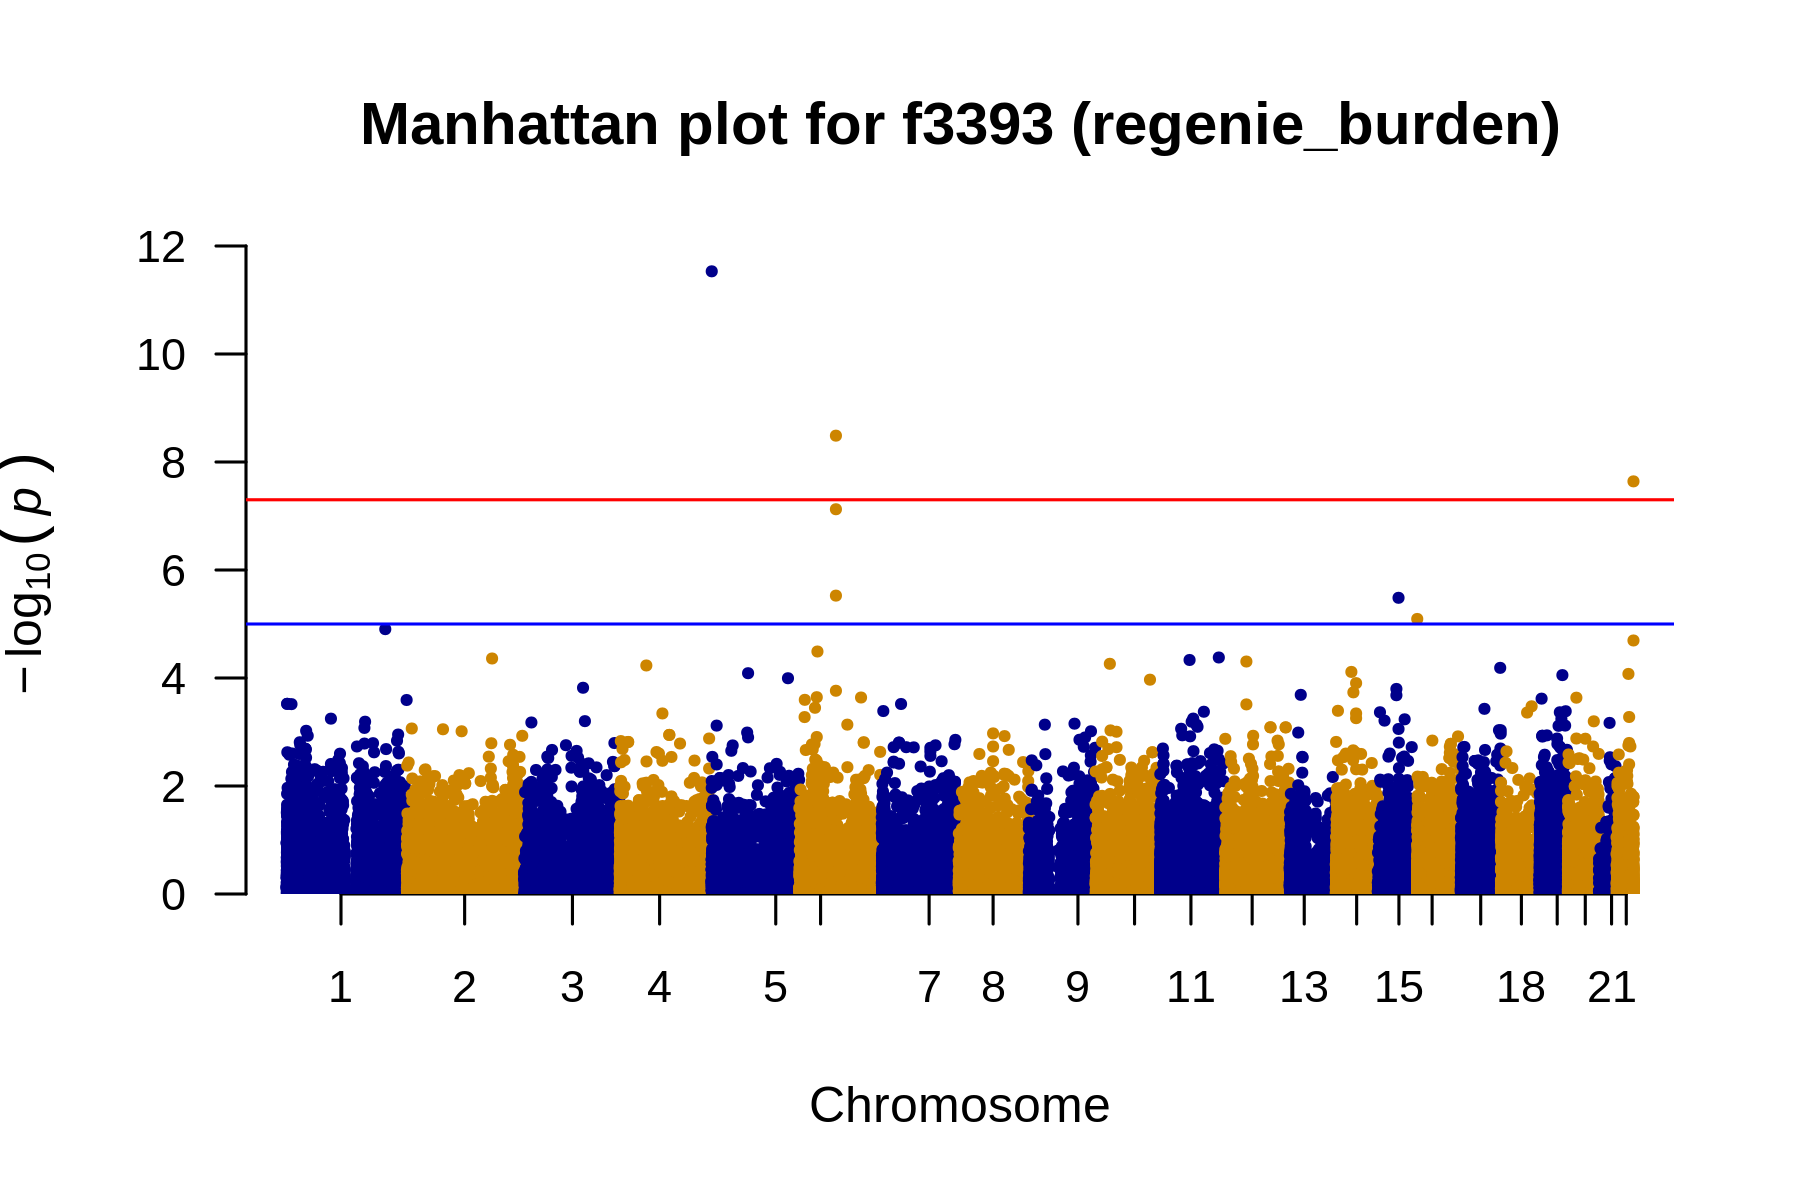

In [25]:
%preview -s png /home/dmc2245/UKBiobank/results/ukb23155_200Kexomes_annovar/burden_test_0.05/080421_UKBB_Hearing_aid_f3393_expandedwhite_6305cases_98082ctrl_f3393.regenie_burden.manhattan.png